In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [106]:
sz50 = ts.get_k_data('hs300',start='2000-01-01').set_index('date')
sz50['return'] = sz50.close.pct_change()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [107]:
period=240
sz50['pos'] = (sz50.close-sz50.close.rolling(period).mean())/sz50.close.rolling(period).std()
sz50.dropna(inplace=True)

In [108]:
df_wt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_wt.iloc[0,0] = 0.5
df_wt.iloc[0,1] = 0.5

In [109]:
df_rt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_rt['cash'] = 0
df_rt['sz50'] = sz50['return']

In [120]:
signal = np.percentile(sz50.pos,[2,98])
print(signal)

[-2.35110502  3.00644232]


In [121]:
for i in sz50.index[1:]:
    df_wt.loc[i,'cash'] = df_wt.shift(1).loc[i,'cash']*(1+df_rt.loc[i,'cash'])
    df_wt.loc[i,'sz50'] = df_wt.shift(1).loc[i,'sz50']*(1+df_rt.loc[i,'sz50'])
    
    if sz50.loc[i,'pos']<signal[0]:
        df_wt.loc[i,'sz50'] = df_wt.loc[i].sum()
        df_wt.loc[i,'cash'] = 0
    elif sz50.loc[i,'pos']>signal[1]:
        df_wt.loc[i,'cash'] = df_wt.loc[i].sum()
        df_wt.loc[i,'sz50'] = 0


<AxesSubplot:xlabel='date'>

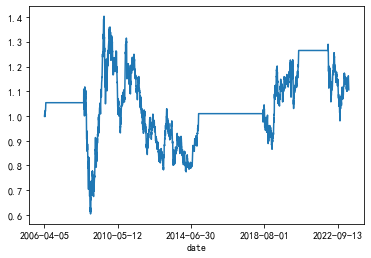

In [122]:
df_wt.T.sum().plot()

In [123]:
1.6**0.05

1.0237784865237978